In [8]:
import torch
import torch.nn as nn
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

In [11]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)
print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


In [17]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))
print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")

`fibonacci` is a 1-d Tensor with shape torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


In [37]:
matrix = torch.zeros(2, 2)
assert isinstance(matrix, torch.Tensor)
assert matrix.ndim == 2

images = torch.zeros((10, 3, 256, 256))
assert isinstance(images, torch.Tensor)
assert images.ndim == 4
assert images.shape == (10, 3, 256, 256)
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


In [39]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([0., 0.])
`column_vector`: tensor([0., 0.])
`scalar`: 0.0


In [40]:
a = torch.tensor(15)
b = torch.tensor(61)

c1 = torch.add(a, b)
c2 = a + b
print(f"c1: {c1}")
print(f"c2: {c2}")

c1: 76
c2: 76


In [43]:
def func(a, b):
    c = torch.add(a, b)
    d = torch.subtract(b, 1)
    e = torch.multiply(c, d)
    return e

In [48]:
a, b = 1.5, 2.5
e_out = func(a, b)
print(f"e_out: {e_out}") # scalar value

e_out: 6.0


In [57]:
### Defining a dense layer
# num_inputs: number of input nodes
# num_outputs: number of output nodes
# x: input to the layer

class OurDenseLayer(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(OurDenseLayer, self).__init__()
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that the parameter initialize is random!

        self.W = torch.nn.Parameter(torch.randn(num_inputs, num_outputs))
        self.bias = torch.nn.Parameter(torch.randn(num_outputs))
    def forward(self, x):
        z = torch.matmul(x, self.W) + self.bias
        y = torch.sigmoid(z)
        return y

In [58]:
num_inputs = 2
num_outputs = 3
layer = OurDenseLayer(num_inputs, num_outputs)
x_input = torch.tensor([[1, 2.]])
y = layer(x_input)

print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 3])
output result: tensor([[0.0815, 0.0123, 0.9661]], grad_fn=<SigmoidBackward0>)


In [112]:
# Defining neural network using the PyTorch Sequential API
n_input_nodes = 2
n_output_nodes = 5
model = nn.Sequential(
    nn.Linear(n_input_nodes, n_output_nodes),
    nn.Sigmoid()
)

In [115]:
x_input = torch.tensor([[1, 2.]])
model_output = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {model_output.shape}")
print(f"output result: {model_output}")
print(f"weight: {model[0].weight}")
print(f"weight: {model[0].bias}")

input shape: torch.Size([1, 2])
output shape: torch.Size([1, 5])
output result: tensor([[0.4235, 0.1736, 0.7574, 0.5862, 0.4991]], grad_fn=<SigmoidBackward0>)
weight: Parameter containing:
tensor([[ 0.0600,  0.0996],
        [-0.4243, -0.5876],
        [ 0.1326,  0.4743],
        [ 0.6020,  0.1099],
        [-0.0756,  0.3480]], requires_grad=True)
weight: Parameter containing:
tensor([-0.5675,  0.0392,  0.0575, -0.4736, -0.6238], requires_grad=True)


In [116]:
class LinearWithSigmoidActivation(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearWithSigmoidActivation, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.activation = nn.Sigmoid()
    def forward(self, inputs):
        linear_output = self.linear(inputs)
        output = self.activation(linear_output)
        return output

In [139]:
n_input_nodes = 3
n_output_nodes = 6
model = LinearWithSigmoidActivation(n_input_nodes, n_output_nodes)
x_input = torch.tensor([1, 2.0, 3])
y = model(x_input)
print(f"input shape: {x_input.shape}")
print(f"output shape: {y.shape}")
print(f"output result: {y}")


input shape: torch.Size([3])
output shape: torch.Size([6])
output result: tensor([0.4148, 0.8259, 0.6360, 0.6011, 0.6685, 0.0814],
       grad_fn=<SigmoidBackward0>)


In [144]:
class LinearButSometimesIdentity(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearButSometimesIdentity, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, inputs, isidentity=False):
        if isidentity:
            return inputs
        else:
            return self.linear(inputs)

In [151]:
model = LinearButSometimesIdentity(num_inputs=2, num_outputs=3)
x_input = torch.tensor([1, 2.])

out_with_linear = model(x_input)
print(out_with_linear)
out_with_identity = model(x_input, isidentity=True)
print(out_with_identity)


tensor([-0.2571,  0.9732, -0.2035], grad_fn=<ViewBackward0>)
tensor([1., 2.])


### Automatic Differentiation in Pytorch

In [158]:
# gradient of y = x^2
# example x = 3.0

x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()

In [163]:
dy_dx = x.grad
print("dy_dx of y=x^2 at x=3.0 is: ", dy_dx)
assert dy_dx == 6.0

dy_dx of y=x^2 at x=3.0 is:  tensor(6.)


Initializing x=-0.5261537432670593


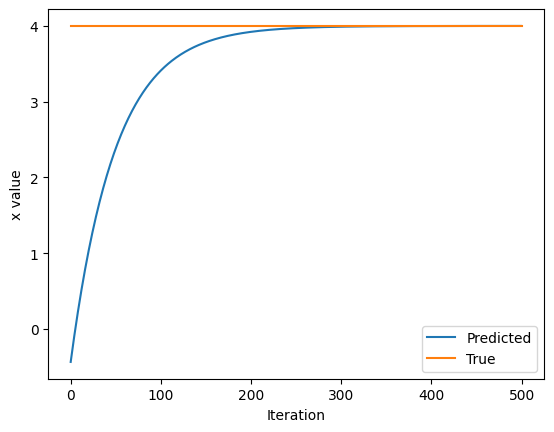

In [169]:
x = torch.randn(1)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2
history = []
x_f = 4 # target value

# Run gradient descent for a number of iterations. At each iteration, compute the loss
# and the derivative of the loss with respect to x, and update

for i in range(500):
    x = torch.tensor([x], requires_grad=True)
    loss = (x - x_f) ** 2
    loss.backward()
    x = x.item() - learning_rate * x.grad
    history.append(x.item())
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()